In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

In [71]:
monthly_sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
daily_min_temperatures_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'

# Daily Min Temperatures

## Load dataset

In [157]:
df = pd.read_csv(daily_min_temperatures_url, index_col=0, parse_dates=True)

## EDA

In [158]:
df.shape

(3650, 1)

In [159]:
print(f"Keys: {df['Temp'].keys()}")
print(f"Values: {df['Temp'].values}")
df['Temp']

Keys: DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)
Values: [20.7 17.9 18.8 ... 13.5 15.7 13. ]


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [160]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


In [162]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [165]:
print(df.isnull().sum())

Temp    0
dtype: int64


<Axes: xlabel='Date'>

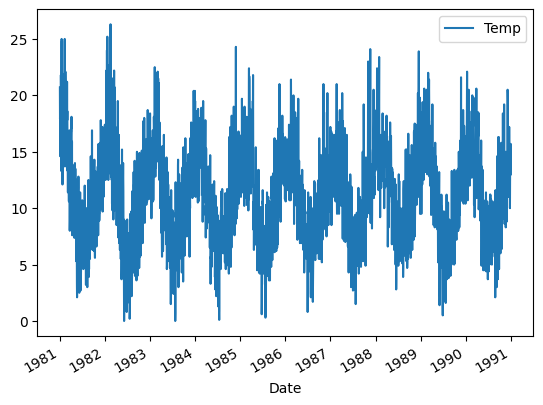

In [77]:
df.plot()

### Auto-Correlation Function (ACF)
Autocorrelation measures the linear relationship between a time series and its lagged values. It helps to identify the presence of periodic patterns in the data. The ACF plot displays the correlation coefficient at various lags, showing the relationship between the time series and its past values.


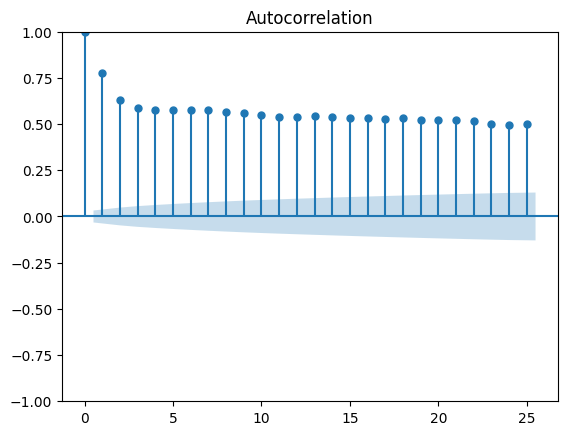

In [78]:
plot_acf(df, lags=25)
plt.show()

### Partial Auto-Correlation (PACF)
Partial Autocorrelation removes the influence of intermediate lags and measures the direct relationship between a time series and its lagged values. PACF helps identify the number of AR terms in an ARIMA model.

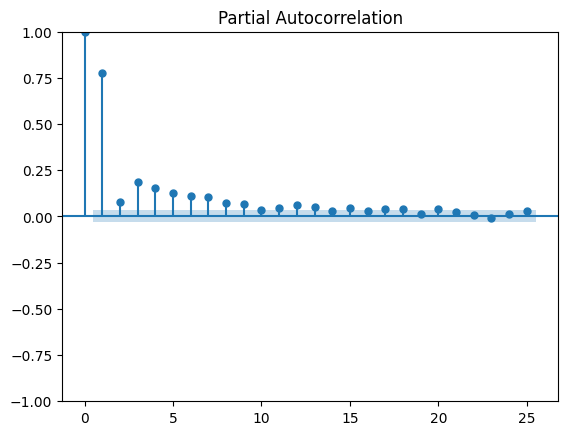

In [79]:
plot_pacf(df, lags=25)
plt.show()

In [80]:
result = adfuller(df['Temp'])
labels = ['Test parameters', 'p-value','Lags Used','Dataset observations']
for value,label in zip(result,labels):
    print(label+' : '+str(value) )

# Check if the p-value from the result is less than or equal to 0.05
if result[1] <= 0.05:
    print("Dataset is stationary")
else:
    print("Dataset is non-stationary ")

# If the p-value is less than
# or equal to 0.05, it indicates that the dataset is stationary, and the corresponding message is printed.
# Otherwise, if the p-value is greater than 0.05, the dataset is considered non-stationary, and the
# appropriate message is printed.


Test parameters : -4.444804924611683
p-value : 0.0002470826300361156
Lags Used : 20
Dataset observations : 3629
Dataset is stationary


## Split the Dataset to Train & Test

In [81]:
X = df.values

In [82]:
# split dataset into train and test sets where the last 7 days are test data
train = X[:len(X) - 7]
test = X[len(X) - 7:]

## Auto Regression model

In [83]:
#import AutoReg
ar_model = AutoReg(train, lags=50).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(50)   Log Likelihood               -8214.081
Method:               Conditional MLE   S.D. of innovations              2.380
Date:                Wed, 02 Aug 2023   AIC                          16532.162
Time:                        21:54:33   BIC                          16853.873
Sample:                            50   HQIC                         16646.824
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7305      0.155      4.710      0.000       0.427       1.034
y.L1           0.5850      0.017     35.052      0.000       0.552       0.618
y.L2          -0.0897      0.019     -4.639      0.0

### Prediction

predicted=11.684021, expected=12.900000
predicted=13.023196, expected=14.600000
predicted=13.686823, expected=14.000000
predicted=13.026093, expected=13.600000
predicted=13.489711, expected=13.500000
predicted=13.699459, expected=15.700000
predicted=13.356606, expected=13.000000
Test RMSE: 1.103


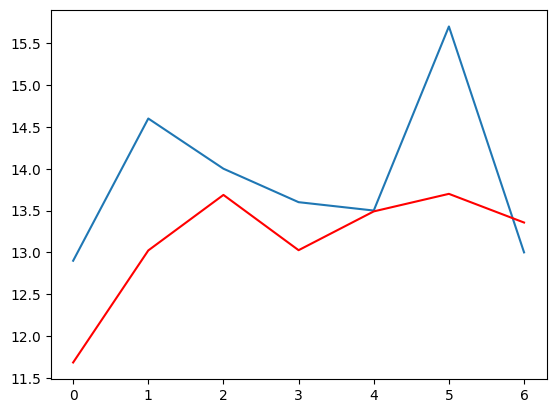

In [84]:
# Predictions
pred_ar = ar_model.predict(start=len(train), end=len(X)-1, dynamic=False)
for i in range(len(pred_ar)):
    print('predicted=%f, expected=%f' % (pred_ar[i], test[i]))
    # print('predicted=%f, expected=%f' % (round(pred_ar[i]), round(float(test[i]))))
    
rmse_ar = sqrt(mean_squared_error(test, pred_ar))
print('Test RMSE: %.3f' % rmse_ar)

# plot results
plt.plot(test)
plt.plot(pred_ar, color='red')
plt.show()

### Future Prediction

In [85]:
from datetime import timedelta
future_ar = ar_model.predict(start=len(X)+1, end=len(X)+7, dynamic=False)
# store the last date of the dataset
last_date = df['Temp'].keys()[len(X)-1]
# for i in range(0,7):
#     print((last_date + timedelta(days=i+1)).strftime("%Y-%m-%d"), future_ar[i])

# show with pandas
future_ar = pd.DataFrame({'Predicted value':future_ar}, index=pd.date_range(start=(last_date + timedelta(days=1)), periods=7))
future_ar

,Predicted value
1991-01-01,14.038524
1991-01-02,14.087160
1991-01-03,13.776769
1991-01-04,14.004854
1991-01-05,13.807047
1991-01-06,14.026091
1991-01-07,13.910888


## ARIMA

In [154]:
model_arima = ARIMA(train, order=(20, 1, 20)) 
results_ARIMA = model_arima.fit()

### Predictions

predicted=12.162199, expected=12.900000
predicted=13.648348, expected=14.600000
predicted=14.225040, expected=14.000000
predicted=13.796515, expected=13.600000
predicted=13.879503, expected=13.500000
predicted=13.963110, expected=15.700000
predicted=13.775993, expected=13.000000
Test RMSE: 0.870


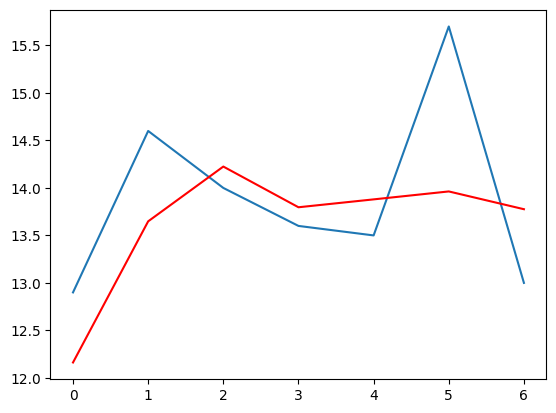

In [87]:
# Predictions
pred_arima = results_ARIMA.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(pred_arima)):
    print('predicted=%f, expected=%f' % (pred_arima[i], test[i]))
    # print('predicted=%f, expected=%f' % (round(predictions[i]), round(int(test[i]))))

rmse_arima = sqrt(mean_squared_error(test, pred_arima))
print('Test RMSE: %.3f' % rmse_arima)

# plot results
plt.plot(test)
plt.plot(pred_arima, color='red')
plt.show()

### Future Prediction

In [88]:
from datetime import timedelta
future_arima = results_ARIMA.predict(start=len(X)+1, end=len(X)+7, dynamic=False)
# store the last date of the dataset
last_date = df['Temp'].keys()[len(X)-1]
# for i in range(0,7):
#     print((last_date + timedelta(days=i+1)).strftime("%Y-%m-%d"), future_ar[i])

# show with pandas
future_arima = pd.DataFrame({'Predicted value':future_arima}, index=pd.date_range(start=(last_date + timedelta(days=1)), periods=7))
future_arima

,Predicted value
1991-01-01,14.190284
1991-01-02,14.252876
1991-01-03,14.534651
1991-01-04,14.594966
1991-01-05,14.284199
1991-01-06,14.508510
1991-01-07,14.424422


## Moving Average

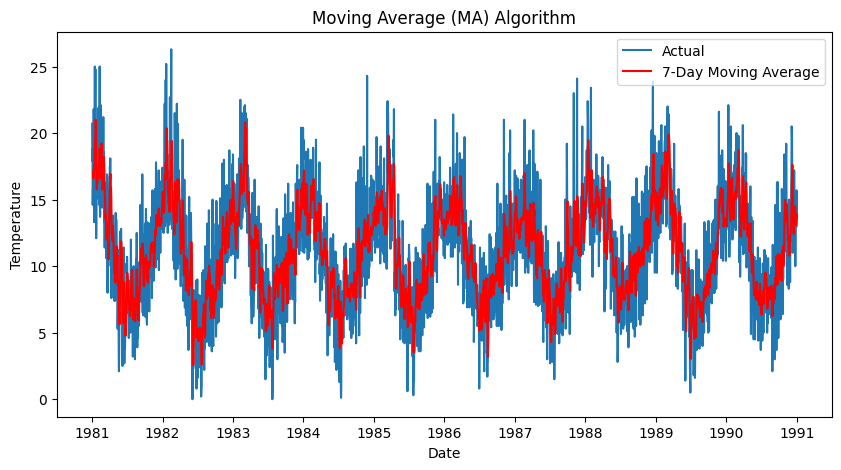

In [89]:
# MA Algorithm
window_size = 7
moving_avg = df['Temp'].rolling(window=7).mean()
# Plot the Moving Average
plt.figure(figsize=(10, 5))
plt.plot(df, label='Actual')
plt.plot(moving_avg, label=f'{window_size}-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Moving Average (MA) Algorithm')
plt.legend()
plt.show()

In [90]:
# MA using ARIMA
ma_model = ARIMA(train, order=(0, 0, 50)).fit()
print(ma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3643
Model:                ARIMA(0, 0, 50)   Log Likelihood               -8377.680
Date:                Wed, 02 Aug 2023   AIC                          16859.360
Time:                        21:59:05   BIC                          17181.789
Sample:                             0   HQIC                         16974.197
                               - 3643                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2205      0.317     35.370      0.000      10.599      11.842
ma.L1          0.6076      0.016     39.081      0.000       0.577       0.638
ma.L2          0.2844      0.018     15.615      0.0

### Prediction

predicted=11.590770, expected=12.900000
predicted=12.744430, expected=14.600000
predicted=13.100422, expected=14.000000
predicted=12.345595, expected=13.600000
predicted=12.840443, expected=13.500000
predicted=13.062895, expected=15.700000
predicted=12.682617, expected=13.000000
Test RMSE: 1.465


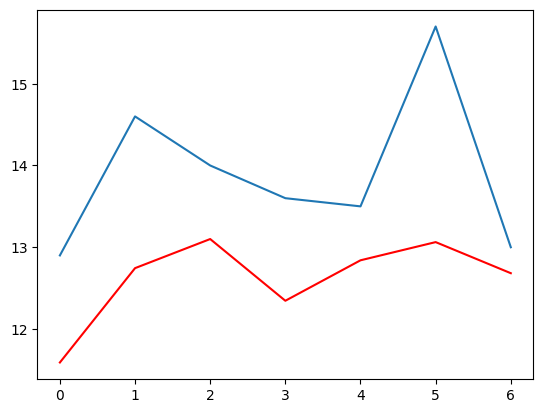

In [118]:
# Predictions
pred_ma = ma_model.predict(start=len(train), end=len(X)-1, dynamic=False)
for i in range(len(pred_ma)):
    print('predicted=%f, expected=%f' % (pred_ma[i], test[i]))
    # print('predicted=%f, expected=%f' % (round(pred_ar[i]), round(float(test[i]))))
    
rmse_ma = sqrt(mean_squared_error(test, pred_ma))
print('Test RMSE: %.3f' % rmse_ma)

# plot results
plt.plot(test)
plt.plot(pred_ma, color='red')
plt.show()

### Future Prediction

In [92]:
from datetime import timedelta
future_ma = ma_model.predict(start=len(X)+1, end=len(X)+7, dynamic=False)
# store the last date of the dataset
last_date = df['Temp'].keys()[len(X)-1]
# for i in range(0,7):
#     print((last_date + timedelta(days=i+1)).strftime("%Y-%m-%d"), future_ar[i])

# show with pandas
future_ma = pd.DataFrame({'Predicted value':future_ma}, index=pd.date_range(start=(last_date + timedelta(days=1)), periods=7))
future_ma

,Predicted value
1991-01-01,13.460461
1991-01-02,13.568768
1991-01-03,13.151714
1991-01-04,13.258874
1991-01-05,13.127583
1991-01-06,13.425048
1991-01-07,13.260905


## ARMA

In [93]:
arma_model = ARIMA(train, order=(20, 0, 20)).fit()
print(arma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3643
Model:               ARIMA(20, 0, 20)   Log Likelihood               -8314.106
Date:                Wed, 02 Aug 2023   AIC                          16712.212
Time:                        22:00:15   BIC                          16972.635
Sample:                             0   HQIC                         16804.965
                               - 3643                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1760      0.114     98.256      0.000      10.953      11.399
ar.L1          0.4613     54.010      0.009      0.993    -105.397     106.319
ar.L2         -0.4274     46.716     -0.009      0.9

### Predictions

predicted=12.093732, expected=12.900000
predicted=13.605743, expected=14.600000
predicted=14.044365, expected=14.000000
predicted=13.723485, expected=13.600000
predicted=14.065288, expected=13.500000
predicted=14.163847, expected=15.700000
predicted=13.795591, expected=13.000000
Test RMSE: 0.842


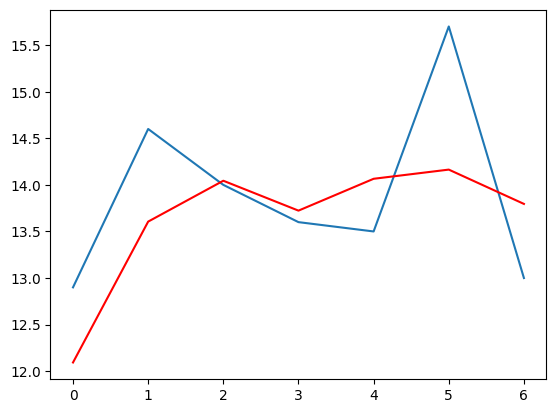

In [94]:
# Predictions
pred_arma = arma_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(pred_arma)):
    print('predicted=%f, expected=%f' % (pred_arma[i], test[i]))
    # print('predicted=%f, expected=%f' % (round(predictions[i]), round(int(test[i]))))
rmse_arma = sqrt(mean_squared_error(test, pred_arma))
print('Test RMSE: %.3f' % rmse_arma)
# plot results
plt.plot(test)
plt.plot(pred_arma, color='red')
plt.show()

### Future Prediction

In [95]:
from datetime import timedelta
future_arma = arma_model.predict(start=len(X)+1, end=len(X)+7, dynamic=False)
# store the last date of the dataset
last_date = df['Temp'].keys()[len(X)-1]
# for i in range(0,7):
#     print((last_date + timedelta(days=i+1)).strftime("%Y-%m-%d"), future_ar[i])

# show with pandas
future_arma = pd.DataFrame({'Predicted value':future_arma}, index=pd.date_range(start=(last_date + timedelta(days=1)), periods=7))
future_arma

,Predicted value
1991-01-01,14.177951
1991-01-02,14.131332
1991-01-03,13.959316
1991-01-04,14.063508
1991-01-05,13.942510
1991-01-06,14.120558
1991-01-07,14.132611


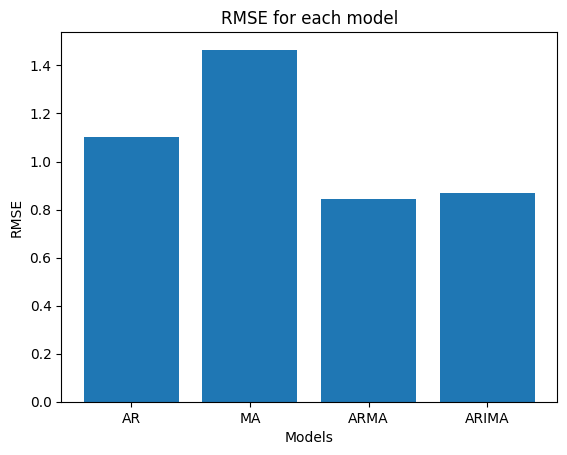

,Model,RMSE
2,ARMA,0.842455
3,ARIMA,0.870322
0,AR,1.103359
1,MA,1.465316


In [153]:
#Comparing rsme for each model
rsme_scores = [rmse_ar, rmse_ma, rmse_arma, rmse_arima]
models = ['AR','MA','ARMA','ARIMA']
plt.bar(models, rsme_scores)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE for each model')
plt.show()
#make table
data = {'Model': models, 'RMSE': rsme_scores}
results = pd.DataFrame(data)
sort_results = results.sort_values('RMSE')
sort_results

# Monthly Sunspots

## Load dataset

In [96]:
df_monthly = pd.read_csv(monthly_sunspots_url, index_col=0, parse_dates=True)

## EDA

In [97]:
df_monthly.shape

(2820, 1)

In [98]:
df_monthly.head()

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


In [99]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2820 entries, 1749-01-01 to 1983-12-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sunspots  2820 non-null   float64
dtypes: float64(1)
memory usage: 44.1 KB


In [100]:
print(f"Keys: {df_monthly['Sunspots'].keys()}")
print(f"Values: {df_monthly['Sunspots'].values}")
df_monthly['Sunspots']

Keys: DatetimeIndex(['1749-01-01', '1749-02-01', '1749-03-01', '1749-04-01',
               '1749-05-01', '1749-06-01', '1749-07-01', '1749-08-01',
               '1749-09-01', '1749-10-01',
               ...
               '1983-03-01', '1983-04-01', '1983-05-01', '1983-06-01',
               '1983-07-01', '1983-08-01', '1983-09-01', '1983-10-01',
               '1983-11-01', '1983-12-01'],
              dtype='datetime64[ns]', name='Month', length=2820, freq=None)
Values: [58.  62.6 70.  ... 55.8 33.3 33.4]


Month
1749-01-01    58.0
1749-02-01    62.6
1749-03-01    70.0
1749-04-01    55.7
1749-05-01    85.0
              ... 
1983-08-01    71.8
1983-09-01    50.3
1983-10-01    55.8
1983-11-01    33.3
1983-12-01    33.4
Name: Sunspots, Length: 2820, dtype: float64

In [167]:
print(df_monthly.isnull().sum())

Sunspots    0
dtype: int64


<Axes: xlabel='Month'>

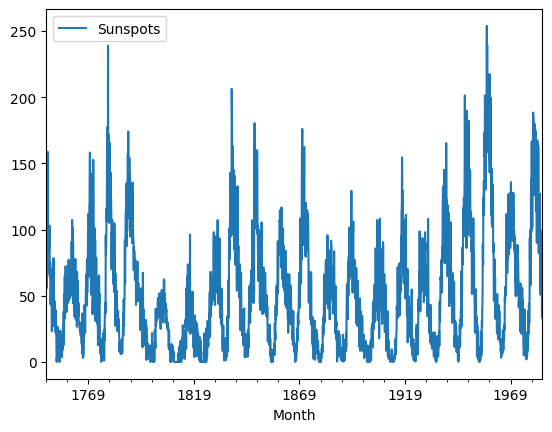

In [101]:
df_monthly.plot()

### Auto-Correlation Function (ACF)
Autocorrelation measures the linear relationship between a time series and its lagged values. It helps to identify the presence of periodic patterns in the data. The ACF plot displays the correlation coefficient at various lags, showing the relationship between the time series and its past values.


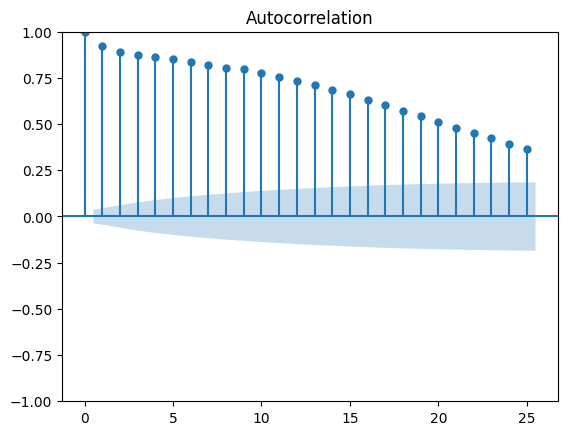

In [102]:
plot_acf(df_monthly, lags=25)
plt.show()

### Partial Auto-Correlation (PACF)
Partial Autocorrelation removes the influence of intermediate lags and measures the direct relationship between a time series and its lagged values. PACF helps identify the number of AR terms in an ARIMA model.

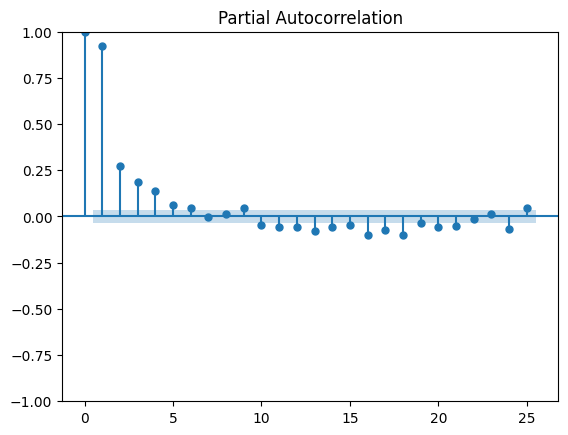

In [103]:
plot_pacf(df_monthly, lags=25)
plt.show()

In [104]:
result = adfuller(df_monthly['Sunspots'])
labels = ['Test parameters', 'p-value','Lags Used','Dataset observations']
for value,label in zip(result,labels):
    print(label+' : '+str(value) )
if result[1] <= 0.05:
    print("Dataset is stationary")
else:
    print("Dataset is non-stationary ")

Test parameters : -9.567667511913086
p-value : 2.333452143866187e-16
Lags Used : 27
Dataset observations : 2792
Dataset is stationary


## Split the Dataset to Train & Test

In [105]:
X_monthly = df_monthly.values

In [138]:
# split dataset into train and test sets where the last 12 months are test data
train_monthly = X_monthly[:len(X_monthly) - 12]
test_monthly = X_monthly[len(X_monthly) - 12:]

## Auto Regression model

In [107]:
#import AutoReg
ar_model_monthly = AutoReg(train_monthly, lags=50).fit()
print(ar_model_monthly.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 2820
Model:                    AutoReg(50)   Log Likelihood              -11443.350
Method:               Conditional MLE   S.D. of innovations             15.063
Date:                Wed, 02 Aug 2023   AIC                          22990.701
Time:                        22:00:16   BIC                          23298.884
Sample:                            50   HQIC                         23102.004
                                 2820                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3214      0.645      6.696      0.000       3.056       5.586
y.L1           0.5403      0.019     28.441      0.000       0.503       0.578
y.L2           0.0954      0.022      4.420      0.0

### Prediction

In [128]:
print(len(X_monthly))

2820


predicted=112.180853, expected=84.300000
predicted=81.635532, expected=51.000000
predicted=66.229159, expected=66.500000
predicted=61.726594, expected=80.700000
predicted=74.230349, expected=99.200000
predicted=89.064332, expected=91.100000
predicted=72.232677, expected=82.200000
predicted=71.542020, expected=71.800000
predicted=74.397530, expected=50.300000
predicted=57.159662, expected=55.800000
predicted=54.879592, expected=33.300000
predicted=33.865900, expected=33.400000
Test RMSE: 17.915


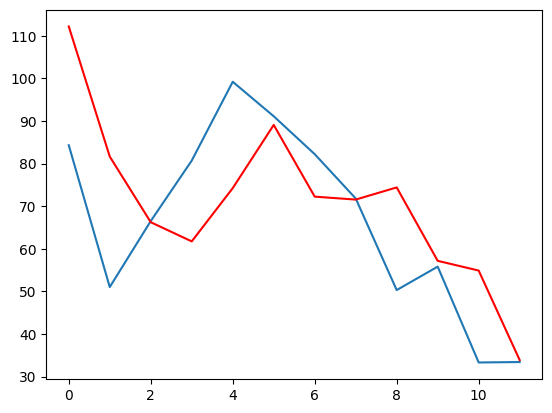

In [147]:
# Predictions
pred_ar_monthly = ar_model_monthly.predict(start=len(train_monthly), end=len(X_monthly)-1, dynamic=False)
for i in range(len(pred_ar_monthly)):
    print('predicted=%f, expected=%f' % (pred_ar_monthly[i], test_monthly[i]))
    # print('predicted=%f, expected=%f' % (round(pred_ar[i]), round(float(test[i]))))
    
rmse_ar_monthly = sqrt(mean_squared_error(test_monthly, pred_ar_monthly))
print('Test RMSE: %.3f' % rmse_ar_monthly)

# plot results
plt.plot(test_monthly)
plt.plot(pred_ar_monthly, color='red')
plt.show()

### Future Prediction

In [121]:
future_ar_monthly = ar_model_monthly.predict(start=len(X_monthly)+1, end=len(X_monthly)+7, dynamic=False)
# store the last date of the dataset
last_month = df_monthly['Sunspots'].keys()[len(X_monthly)-1]

# show with pandas first of month
future_ar_monthly = pd.DataFrame({'Predicted Value': future_ar_monthly}, index=pd.date_range(start=(last_month + timedelta(days=31)), periods=7, freq='MS'))
future_ar_monthly

,Predicted Value
1984-01-01,35.611801
1984-02-01,34.672546
1984-03-01,37.300551
1984-04-01,33.605298
1984-05-01,22.751865
1984-06-01,20.203219
1984-07-01,24.093217


## ARIMA

In [114]:
model_arima_monthly = ARIMA(train_monthly, order=(20, 1, 20)) 
results_ARIMA_monthly = model_arima_monthly.fit()

### Predictions

predicted=115.048804, expected=84.300000
predicted=92.293717, expected=51.000000
predicted=69.304093, expected=66.500000
predicted=70.229781, expected=80.700000
predicted=79.914791, expected=99.200000
predicted=91.990326, expected=91.100000
predicted=80.392373, expected=82.200000
predicted=75.510847, expected=71.800000
predicted=80.730169, expected=50.300000
predicted=61.370950, expected=55.800000
predicted=58.260647, expected=33.300000
predicted=40.769292, expected=33.400000
Test RMSE: 19.984


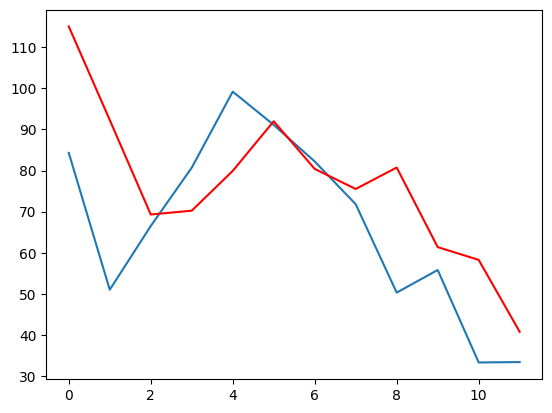

In [141]:
# Predictions
pred_arima_monthly = results_ARIMA_monthly.predict(start=len(train_monthly), end=len(train_monthly)+len(test_monthly)-1, dynamic=False)
for i in range(len(pred_arima_monthly)):
    print('predicted=%f, expected=%f' % (pred_arima_monthly[i], test_monthly[i]))
    # print('predicted=%f, expected=%f' % (round(predictions[i]), round(int(test[i]))))

rmse_arima_monthly = sqrt(mean_squared_error(test_monthly, pred_arima_monthly))
print('Test RMSE: %.3f' % rmse_arima_monthly)

# plot results
plt.plot(test_monthly)
plt.plot(pred_arima_monthly, color='red')
plt.show()

### Future Prediction

In [142]:
future_arima_monthly = results_ARIMA_monthly.predict(start=len(X_monthly)+1, end=len(X_monthly)+7, dynamic=False)
# store the last date of the dataset
last_month = df_monthly['Sunspots'].keys()[len(X_monthly)-1]

# show with pandas first of month
future_arima_monthly = pd.DataFrame({'Predicted Value': future_arima_monthly}, index=pd.date_range(start=(last_month + timedelta(days=31)), periods=7, freq='MS'))
future_arima_monthly

,Predicted Value
1984-01-01,38.174280
1984-02-01,40.795238
1984-03-01,39.609421
1984-04-01,36.947488
1984-05-01,26.903522
1984-06-01,29.753484
1984-07-01,31.812042


## Moving Average

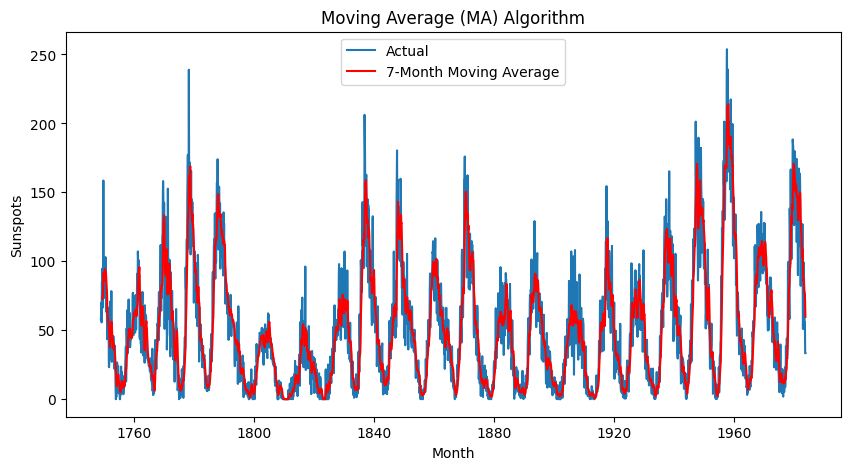

In [143]:
# MA Algorithm
window_size = 7
moving_avg = df_monthly['Sunspots'].rolling(window=7).mean()
# Plot the Moving Average
plt.figure(figsize=(10, 5))
plt.plot(df_monthly, label='Actual')
plt.plot(moving_avg, label=f'{window_size}-Month Moving Average', color='red')
plt.xlabel('Month')
plt.ylabel('Sunspots')
plt.title('Moving Average (MA) Algorithm')
plt.legend()
plt.show()

In [144]:
# MA using ARIMA
ma_model_monthly = ARIMA(train_monthly, order=(0, 0, 50)).fit()
print(ma_model_monthly.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2808
Model:                ARIMA(0, 0, 50)   Log Likelihood              -11628.525
Date:                Wed, 02 Aug 2023   AIC                          23361.051
Time:                        23:12:57   BIC                          23669.943
Sample:                             0   HQIC                         23472.533
                               - 2808                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.2011      5.673      9.026      0.000      40.083      62.319
ma.L1          0.5466      0.015     36.734      0.000       0.517       0.576
ma.L2          0.4005      0.017     23.053      0.0

### Prediction

predicted=116.886411, expected=84.300000
predicted=104.641973, expected=51.000000
predicted=101.449445, expected=66.500000
predicted=93.003146, expected=80.700000
predicted=94.640064, expected=99.200000
predicted=102.591231, expected=91.100000
predicted=90.294954, expected=82.200000
predicted=87.313604, expected=71.800000
predicted=91.725627, expected=50.300000
predicted=90.182136, expected=55.800000
predicted=91.454418, expected=33.300000
predicted=82.963541, expected=33.400000
Test RMSE: 34.771


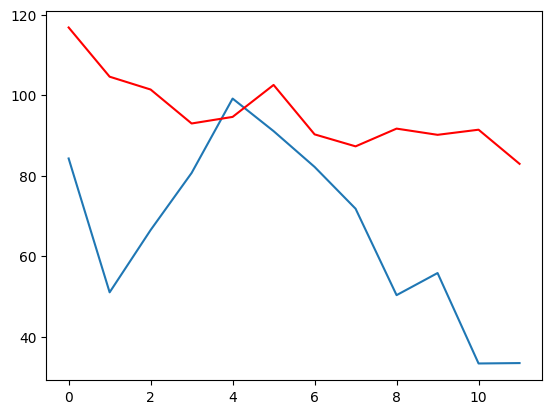

In [146]:
# Predictions
pred_ma_monthly = ma_model_monthly.predict(start=len(train_monthly), end=len(X_monthly)-1, dynamic=False)
for i in range(len(pred_ma_monthly)):
    print('predicted=%f, expected=%f' % (pred_ma_monthly[i], test_monthly[i]))
    # print('predicted=%f, expected=%f' % (round(pred_ar[i]), round(float(test[i]))))
    
rmse_ma_monthly = sqrt(mean_squared_error(test_monthly, pred_ma_monthly))
print('Test RMSE: %.3f' % rmse_ma_monthly)

# plot results
plt.plot(test_monthly)
plt.plot(pred_ma_monthly, color='red')
plt.show()

### Future Prediction

In [ ]:
future_ma_monthly = ma_model_monthly.predict(start=len(X_monthly)+1, end=len(X_monthly)+7, dynamic=False)
# store the last date of the dataset
last_month = df_monthly['Sunspots'].keys()[len(X_monthly)-1]

# show with pandas first of month
future_ma_monthly = pd.DataFrame({'Predicted Value': future_ma_monthly}, index=pd.date_range(start=(last_month + timedelta(days=31)), periods=7, freq='MS'))
future_ma_monthly

,Predicted Value
1984-01-01,86.382762
1984-02-01,82.407812
1984-03-01,75.533274
1984-04-01,55.712316
1984-05-01,30.268503
1984-06-01,30.572136
1984-07-01,36.430140


## ARMA

In [ ]:
arma_model_monthly = ARIMA(train_monthly, order=(20, 0, 20)).fit()
print(arma_model_monthly.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2813
Model:               ARIMA(20, 0, 20)   Log Likelihood              -11644.281
Date:                Wed, 02 Aug 2023   AIC                          23372.562
Time:                        21:46:15   BIC                          23622.126
Sample:                             0   HQIC                         23462.624
                               - 2813                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.2367      4.386     11.683      0.000      42.641      59.833
ar.L1          0.4062      1.400      0.290      0.772      -2.338       3.151
ar.L2          0.1679      1.164      0.144      0.8

### Predictions

predicted=85.392408, expected=91.100000
predicted=72.734743, expected=82.200000
predicted=62.071192, expected=71.800000
predicted=66.672427, expected=50.300000
predicted=63.482521, expected=55.800000
predicted=58.418122, expected=33.300000
predicted=51.227827, expected=33.400000
Test RMSE: 14.603


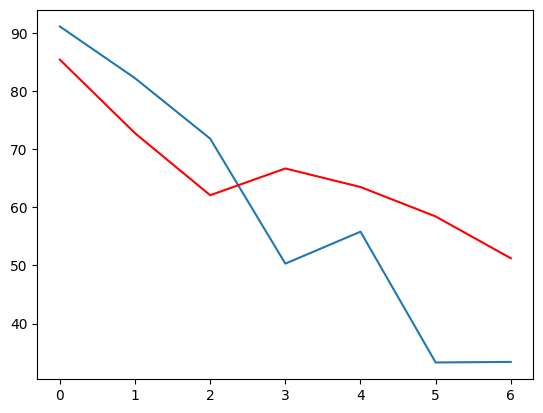

In [ ]:
# Predictions
pred_arma_monthly = arma_model_monthly.predict(start=len(train_monthly), end=len(X_monthly)-1, dynamic=False)
for i in range(len(pred_arma_monthly)):
    print('predicted=%f, expected=%f' % (pred_arma_monthly[i], test_monthly[i]))
    # print('predicted=%f, expected=%f' % (round(predictions[i]), round(int(test[i]))))
rmse_arma_monthly = sqrt(mean_squared_error(test_monthly, pred_arma_monthly))
print('Test RMSE: %.3f' % rmse_arma_monthly)
# plot results
plt.plot(test_monthly)
plt.plot(pred_arma_monthly, color='red')
plt.show()

### Future Prediction

In [ ]:
future_arma_monthly = arma_model_monthly.predict(start=len(X_monthly)+1, end=len(X_monthly)+7, dynamic=False)
# store the last date of the dataset
last_month = df_monthly['Sunspots'].keys()[len(X_monthly)-1]

# show with pandas first of month
future_arma_monthly = pd.DataFrame({'Predicted Value': future_arma_monthly}, index=pd.date_range(start=(last_month + timedelta(days=31)), periods=7, freq='MS'))
future_arma_monthly

,Predicted Value
1984-01-01,48.123686
1984-02-01,45.921505
1984-03-01,48.028706
1984-04-01,40.176685
1984-05-01,32.892978
1984-06-01,32.553208
1984-07-01,38.628912


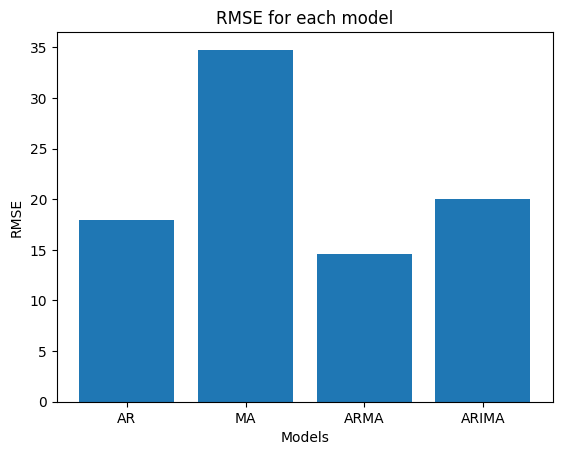

,Model,RMSE
2,ARMA,14.602575
0,AR,17.915120
3,ARIMA,19.983888
1,MA,34.770561


In [152]:
#Comparing rsme for each model
rsme_scores = [rmse_ar_monthly, rmse_ma_monthly, rmse_arma_monthly, rmse_arima_monthly]
models = ['AR','MA','ARMA','ARIMA']
plt.bar(models, rsme_scores)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE for each model')
plt.show()
#make table
data = {'Model': models, 'RMSE': rsme_scores}
results = pd.DataFrame(data)
sort_results = results.sort_values('RMSE')
sort_results

# Time Series Analysis and Traditional Forecasting Algorithms

# Introduction:
Time Series Analysis is a statistical technique used to analyze and forecast data that is collected over time at regular intervals. It involves studying patterns, trends, and seasonality in time-dependent data to make predictions for future values. This documentation covers the basics of time series analysis, including Autocorrelation and Partial Autocorrelation, and explores three traditional forecasting algorithms: Autoregressive (AR), Moving Average (MA), Autoregressive Moving Average (ARMA), and Autoregressive Integrated Moving Average (ARIMA). These algorithms are applied to two datasets: monthly sunspots and daily minimum temperatures.

# Datasets:

**Monthly Sunspots Dataset:** The monthly sunspots dataset contains information about the number of sunspots recorded each month. It can be used to study the periodicity and seasonality of sunspot activity.

**Daily Minimum Temperatures Dataset:** The daily minimum temperatures dataset contains information about the minimum temperatures recorded daily. It can be used to analyze and forecast temperature patterns over time.

# Basics of Time Series Analysis:

**Autocorrelation (ACF):**
Autocorrelation measures the linear relationship between a time series and its lagged values. It helps to identify the presence of periodic patterns in the data. The ACF plot displays the correlation coefficient at various lags, showing the relationship between the time series and its past values.

**Partial Autocorrelation (PACF):**
Partial Autocorrelation removes the influence of intermediate lags and measures the direct relationship between a time series and its lagged values. PACF helps identify the number of AR terms in an ARIMA model.

# Difference between Correlation and Causation:
Correlation measures the statistical relationship between two variables, but it does not imply causation. A high correlation between two variables indicates that they are related in some way, but it does not prove that changes in one variable cause changes in the other. Causation involves demonstrating a cause-and-effect relationship, which requires additional evidence and experimentation.

# Traditional Forecasting Algorithms:

**Autoregressive (AR) Model:**
The AR model uses the past values of a time series to predict future values. It assumes that the future value depends linearly on its past values and a random error term. The order of the AR model, denoted as AR(p), indicates the number of lagged values used for prediction.

**Moving Average (MA) Model:**
The MA model uses the past forecast errors to predict future values. It assumes that the future value depends linearly on the past errors and a random error term. The order of the MA model, denoted as MA(q), indicates the number of past forecast errors used for prediction.

**Autoregressive Moving Average (ARMA) Model:**
The ARMA model combines the AR and MA models. It uses both the past values of the time series and the past forecast errors to predict future values. The order of the ARMA model, denoted as ARMA(p, q), indicates the number of lagged values and past forecast errors used for prediction.

**Autoregressive Integrated Moving Average (ARIMA) Model:**
The ARIMA model extends the ARMA model by including a differencing step to make the time series stationary. It includes three components: autoregression (AR), differencing (I), and moving average (MA). The order of the ARIMA model, denoted as ARIMA(p, d, q), indicates the number of lagged values, differencing orders, and past forecast errors used for prediction.

# Application to Datasets:

I applied the AR, MA, ARMA, and ARIMA algorithms to the two datasets: monthly sunspots and daily minimum temperatures. The models were trained and evaluated on the data to make predictions for future values.

# Root Mean Squared Error (RMSE) Results:

**Dataset 1: Monthly Sunspots**

- ARMA: 14.602575
- AR: 17.915120
- ARIMA: 19.983888
- MA: 34.770561

The best model for Dataset 1 (Monthly Sunspots) is the ARMA model, as it has the lowest RMSE value of 14.602575.

**Dataset 2: Daily Minimum Temperatures**

- ARMA: 0.842455
- ARIMA: 0.870322
- AR: 1.103359
- MA: 1.465316

The best model for Dataset 2 (Daily Minimum Temperatures) is the ARMA model, as it has the lowest RMSE value of 0.842455.

# Conclusion:

Time series analysis, including Autocorrelation and Partial Autocorrelation, is crucial for understanding patterns and seasonality in time-dependent data. The traditional forecasting algorithms (AR, MA, ARMA, and ARIMA) allow us to predict future values based on past observations. By applying these algorithms to the monthly sunspots and daily minimum temperatures datasets, we can gain insights into sunspot activity patterns and temperature trends over time. The RMSE results indicate the accuracy of each model's predictions on the respective datasets.